In [53]:
#importing the Necessary Libaries
import pandas as pd
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load data from CSV file
df = pd.read_csv(r'C:\Users\usrr\Downloads\PYTHON UTIVA\Market Basket Analysis - Groceries_dataset.csv')

In [54]:
# Get summary statistics
print(df.describe())

       Member_number
count   38765.000000
mean     3003.641868
std      1153.611031
min      1000.000000
25%      2002.000000
50%      3005.000000
75%      4007.000000
max      5000.000000


In [55]:
# Remove null rows
print(df.isnull().sum())

Member_number      0
Date               0
itemDescription    0
dtype: int64


There are no null rows

Now lets check for duplicate

In [56]:
df.duplicated().sum()

759

There are 759 duplicates

In [57]:
df['date'] = pd.to_datetime (df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  object        
 2   itemDescription  38765 non-null  object        
 3   date             38765 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.2+ MB


In [58]:
#checking for the overview of the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  object        
 2   itemDescription  38765 non-null  object        
 3   date             38765 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.2+ MB


Date is not suppose to be an object, hence it needs to be converted to datetime format

In [59]:
df.shape

(38765, 4)

The dataset contains 38765 rows and 4 columns

In [60]:
df.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [61]:
# the highest returning rate customer 
df["Member_number"].value_counts()

3180    36
3050    33
3737    33
2051    33
2625    31
        ..
1036     2
1898     2
2720     2
1250     2
3949     2
Name: Member_number, Length: 3898, dtype: int64

from the value counts, customer with the member number 3180 is a customer to keep since he/she has the highest returning rate.

# Visualizing the Top Customers

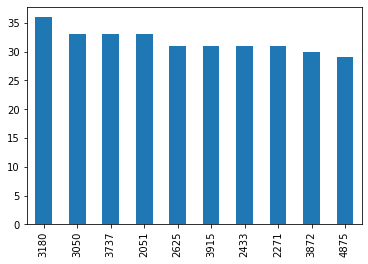

In [62]:
df["Member_number"].value_counts().iloc[:10].plot(kind="bar")
plt.show()

These are the top 10 customers

# Visualizing the Best Selling Items product

In [63]:
df["itemDescription"].value_counts()

whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: itemDescription, Length: 167, dtype: int64

 whole milk is the best selling item, closely followed by other vegetables

# Visualizing the least Selling Items

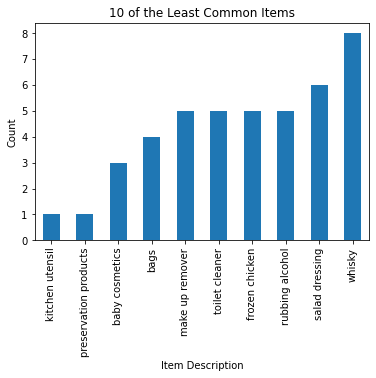

In [64]:
item_counts = df["itemDescription"].value_counts().nsmallest(10)
item_counts.plot(kind="bar")
plt.xlabel("Item Description")
plt.ylabel("Count")
plt.title("10 of the Least Common Items")
plt.show()

These are the least selling items

In [65]:
# Group by transaction ID and create a list of items for each transaction
transactions = df.groupby('Member_number')['itemDescription'].apply(list).reset_index()
print (transactions)

      Member_number                                    itemDescription
0              1000  [soda, canned beer, sausage, sausage, whole mi...
1              1001  [frankfurter, frankfurter, beef, sausage, whol...
2              1002  [tropical fruit, butter milk, butter, frozen v...
3              1003  [sausage, root vegetables, rolls/buns, deterge...
4              1004  [other vegetables, pip fruit, root vegetables,...
...             ...                                                ...
3893           4996  [dessert, salty snack, rolls/buns, misc. bever...
3894           4997  [tropical fruit, white wine, whole milk, curd,...
3895           4998                                 [rolls/buns, curd]
3896           4999  [bottled water, butter milk, tropical fruit, b...
3897           5000  [soda, bottled beer, fruit/vegetable juice, ro...

[3898 rows x 2 columns]


In [66]:
#Since date is already in datetime format, let's extract month and year from it
df['Month'] = df['date'].dt.to_period('M')
#Let's group by month to count the item sold
items_sold_by_month = df.groupby('Month')['itemDescription'].count().reset_index()
items_sold_by_month

,Month,itemDescription
0,2014-01,1504
1,2014-02,1547
2,2014-03,1491
3,2014-04,1506
4,2014-05,1625
5,2014-06,1525
6,2014-07,1623
7,2014-08,1535
8,2014-09,1350
9,2014-10,1555


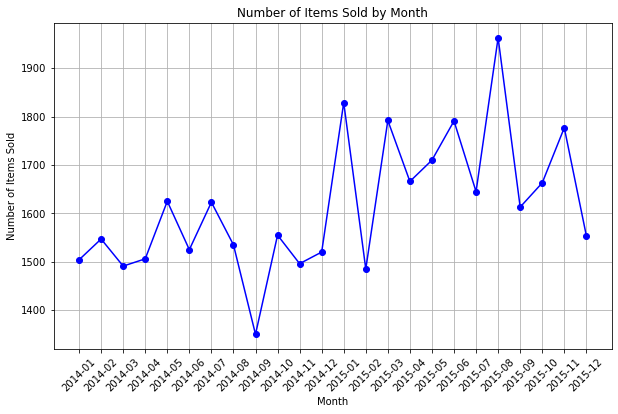

In [67]:
# Convert the 'Month' column to string
items_sold_by_month['Month'] = items_sold_by_month['Month'].astype(str)
# Plotting the number of items sold by month
plt.figure(figsize=(10, 6))
plt.plot(items_sold_by_month['Month'], items_sold_by_month['itemDescription'], marker='o', linestyle='-', color='b')
plt.title('Number of Items Sold by Month')
plt.xlabel('Month')
plt.ylabel('Number of Items Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

The month with the highest sales is August 2015(2015-08), while the lowest is September 2014(2014-09).I also notice a drop after the highest peak in Auguust 2015, thogh it rose ater that month, its not as significant as August 2015

In [68]:
# Count the number of items bought by each customer
items_bought_by_customer= df.groupby('Member_number')['itemDescription'].count().reset_index()

# Sort the customers by the number of items bought (descending order)
Customers_Level = items_bought_by_customer.sort_values(by='itemDescription', ascending=False)

print(Customers_Level)

      Member_number  itemDescription
2120           3180               36
2665           3737               33
1994           3050               33
1026           2051               33
2838           3915               31
...             ...              ...
2462           3533                2
1265           2302                2
3723           4824                2
81             1084                2
2311           3377                2

[3898 rows x 2 columns]


In [69]:
df['single_transaction'] = df['Member_number'].astype(str) + '_' + df['Date'].astype(str)

df.tail()

,Member_number,Date,itemDescription,date,Month,single_transaction
38760,4471,08-10-2014,sliced cheese,2014-08-10,2014-08,4471_08-10-2014
38761,2022,23-02-2014,candy,2014-02-23,2014-02,2022_23-02-2014
38762,1097,16-04-2014,cake bar,2014-04-16,2014-04,1097_16-04-2014
38763,1510,03-12-2014,fruit/vegetable juice,2014-03-12,2014-03,1510_03-12-2014
38764,1521,26-12-2014,cat food,2014-12-26,2014-12,1521_26-12-2014


In [70]:
df2 = pd.crosstab(df['single_transaction'], df['itemDescription'])
df2

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
single_transaction,,,,,,,,,,,,,,,,,,,,,
1000_15-03-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000_24-06-2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000_24-07-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_25-11-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_27-05-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999_24-01-2015,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4999_26-12-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5000_09-03-2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The resulting table tells us how many times each item has been purchased in one transaction:

There are over a hundred columns while most people only shop for 2-3 items, which is why this table is sparse and mostly comprised of zeroes.

The final data pre-processing step involves encoding all values in df datafame and te final preprocessed data df2

This means that even if there are multiples of the same item in the same transaction, the value will be encoded to 1 since market basket analysis does not take purchase frequency into consideration.

# Analysis for df

In [72]:
# One-hot encode the transaction data
one_hot_encoded = pd.get_dummies(df['itemDescription'])
print (one_hot_encoded)

       Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                          0         0                 0                 0   
1                          0         0                 0                 0   
2                          0         0                 0                 0   
3                          0         0                 0                 0   
4                          0         0                 0                 0   
...                      ...       ...               ...               ...   
38760                      0         0                 0                 0   
38761                      0         0                 0                 0   
38762                      0         0                 0                 0   
38763                      0         0                 0                 0   
38764                      0         0                 0                 0   

       baby cosmetics  bags  baking powder  bathroom cleaner  b

In [73]:
# Concatenate one-hot encoded data with the original dataframe
df_encoded = pd.concat([df, one_hot_encoded], axis=1)
print (df_encoded)

       Member_number        Date        itemDescription       date    Month  \
0               1808  21-07-2015         tropical fruit 2015-07-21  2015-07   
1               2552  05-01-2015             whole milk 2015-05-01  2015-05   
2               2300  19-09-2015              pip fruit 2015-09-19  2015-09   
3               1187  12-12-2015       other vegetables 2015-12-12  2015-12   
4               3037  01-02-2015             whole milk 2015-01-02  2015-01   
...              ...         ...                    ...        ...      ...   
38760           4471  08-10-2014          sliced cheese 2014-08-10  2014-08   
38761           2022  23-02-2014                  candy 2014-02-23  2014-02   
38762           1097  16-04-2014               cake bar 2014-04-16  2014-04   
38763           1510  03-12-2014  fruit/vegetable juice 2014-03-12  2014-03   
38764           1521  26-12-2014               cat food 2014-12-26  2014-12   

      single_transaction  Instant food products  UH

In [74]:
# Remove items that occur less frequently (adjust the threshold as needed)
item_counts = df['itemDescription'].value_counts()
threshold = 10
df_filtered = df[df['itemDescription'].isin(item_counts[item_counts >= threshold].index)]
print (df_filtered)

       Member_number        Date        itemDescription       date    Month  \
0               1808  21-07-2015         tropical fruit 2015-07-21  2015-07   
1               2552  05-01-2015             whole milk 2015-05-01  2015-05   
2               2300  19-09-2015              pip fruit 2015-09-19  2015-09   
3               1187  12-12-2015       other vegetables 2015-12-12  2015-12   
4               3037  01-02-2015             whole milk 2015-01-02  2015-01   
...              ...         ...                    ...        ...      ...   
38760           4471  08-10-2014          sliced cheese 2014-08-10  2014-08   
38761           2022  23-02-2014                  candy 2014-02-23  2014-02   
38762           1097  16-04-2014               cake bar 2014-04-16  2014-04   
38763           1510  03-12-2014  fruit/vegetable juice 2014-03-12  2014-03   
38764           1521  26-12-2014               cat food 2014-12-26  2014-12   

      single_transaction  
0        1808_21-07-2015

In [75]:
# Create a transaction-item matrix
transaction_item_matrix = df.pivot_table(index='Member_number', columns='itemDescription', aggfunc='size', fill_value=0)
print (transaction_item_matrix)

itemDescription  Instant food products  UHT-milk  abrasive cleaner  \
Member_number                                                        
1000                                 0         0                 0   
1001                                 0         0                 0   
1002                                 0         0                 0   
1003                                 0         0                 0   
1004                                 0         0                 0   
...                                ...       ...               ...   
4996                                 0         0                 0   
4997                                 0         0                 0   
4998                                 0         0                 0   
4999                                 0         0                 0   
5000                                 0         0                 0   

itemDescription  artif. sweetener  baby cosmetics  bags  baking powder  \
Member_number  

In [76]:
# Explore item frequencies
item_frequencies = df['itemDescription'].value_counts()
print(item_frequencies)

whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: itemDescription, Length: 167, dtype: int64


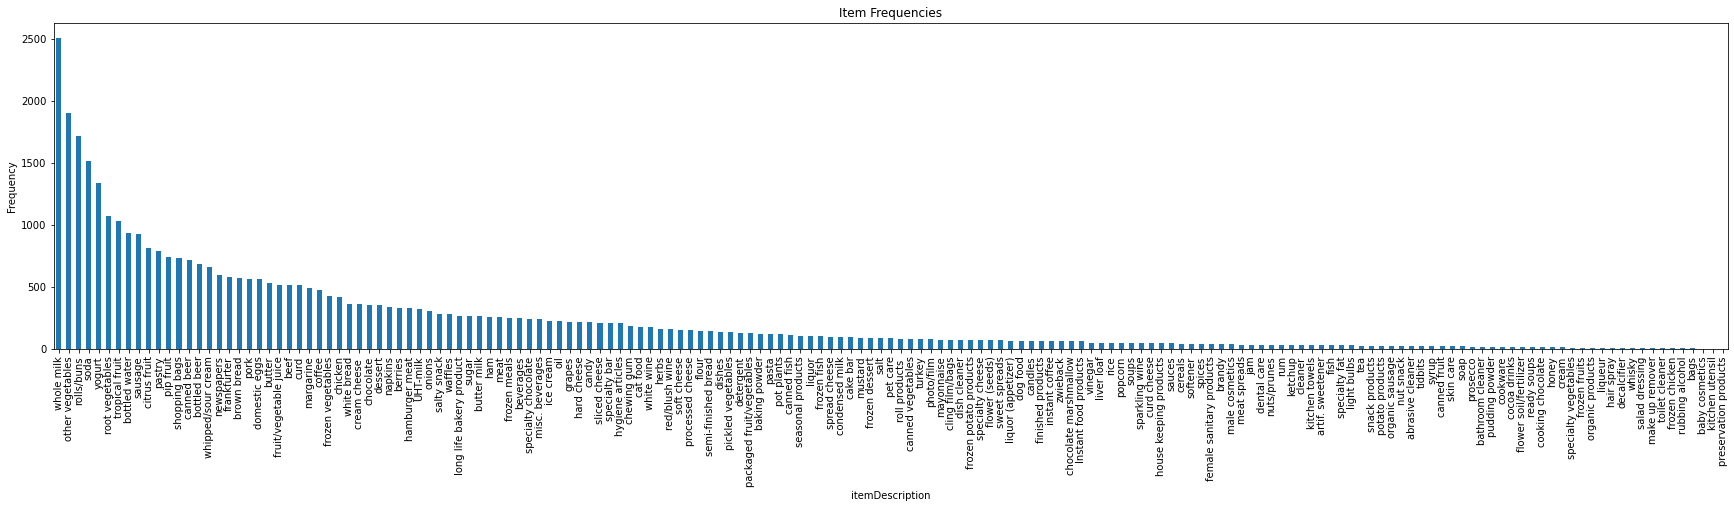

In [77]:
# Display a bar chart of item frequencies
item_frequencies.plot(kind='bar', xlabel='itemDescription', ylabel='Frequency', title='Item Frequencies', figsize=(30, 6))
plt.show()

In [79]:
# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
print (train_df)

       Member_number        Date itemDescription       date    Month  \
26545           4578  08-09-2014          yogurt 2014-08-09  2014-08   
3997            1277  07-06-2015      photo/film 2015-07-06  2015-07   
3397            2435  29-09-2015            beef 2015-09-29  2015-09   
12418           4463  08-06-2014       pip fruit 2014-08-06  2014-08   
6410            2251  27-02-2015    bottled beer 2015-02-27  2015-02   
...              ...         ...             ...        ...      ...   
6265            3067  22-09-2015           candy 2015-09-22  2015-09   
11284           1981  01-11-2014      whole milk 2014-01-11  2014-01   
38158           4504  02-03-2014           soups 2014-02-03  2014-02   
860             1347  27-03-2015            beef 2015-03-27  2015-03   
15795           1505  27-10-2015     canned beer 2015-10-27  2015-10   

      single_transaction  
26545    4578_08-09-2014  
3997     1277_07-06-2015  
3397     2435_29-09-2015  
12418    4463_08-06-2014  


In [80]:
print(test_df)

       Member_number        Date         itemDescription       date    Month  \
22400           1449  03-10-2015          tropical fruit 2015-03-10  2015-03   
38462           3010  13-06-2014        hygiene articles 2014-06-13  2014-06   
36986           4789  09-04-2015        specialty cheese 2015-09-04  2015-09   
2182            1884  11-12-2015             frankfurter 2015-11-12  2015-11   
32319           1997  28-12-2015                  pastry 2015-12-28  2015-12   
...              ...         ...                     ...        ...      ...   
35238           2718  11-08-2014               margarine 2014-11-08  2014-11   
25447           2633  07-09-2014  frozen potato products 2014-07-09  2014-07   
24367           1114  12-03-2015           shopping bags 2015-12-03  2015-12   
13208           3556  04-10-2014                    curd 2014-04-10  2014-04   
26850           1103  25-05-2014                  pastry 2014-05-25  2014-05   

      single_transaction  
22400    144

In [ ]:
#Exploratory Data Analysis (EDA)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

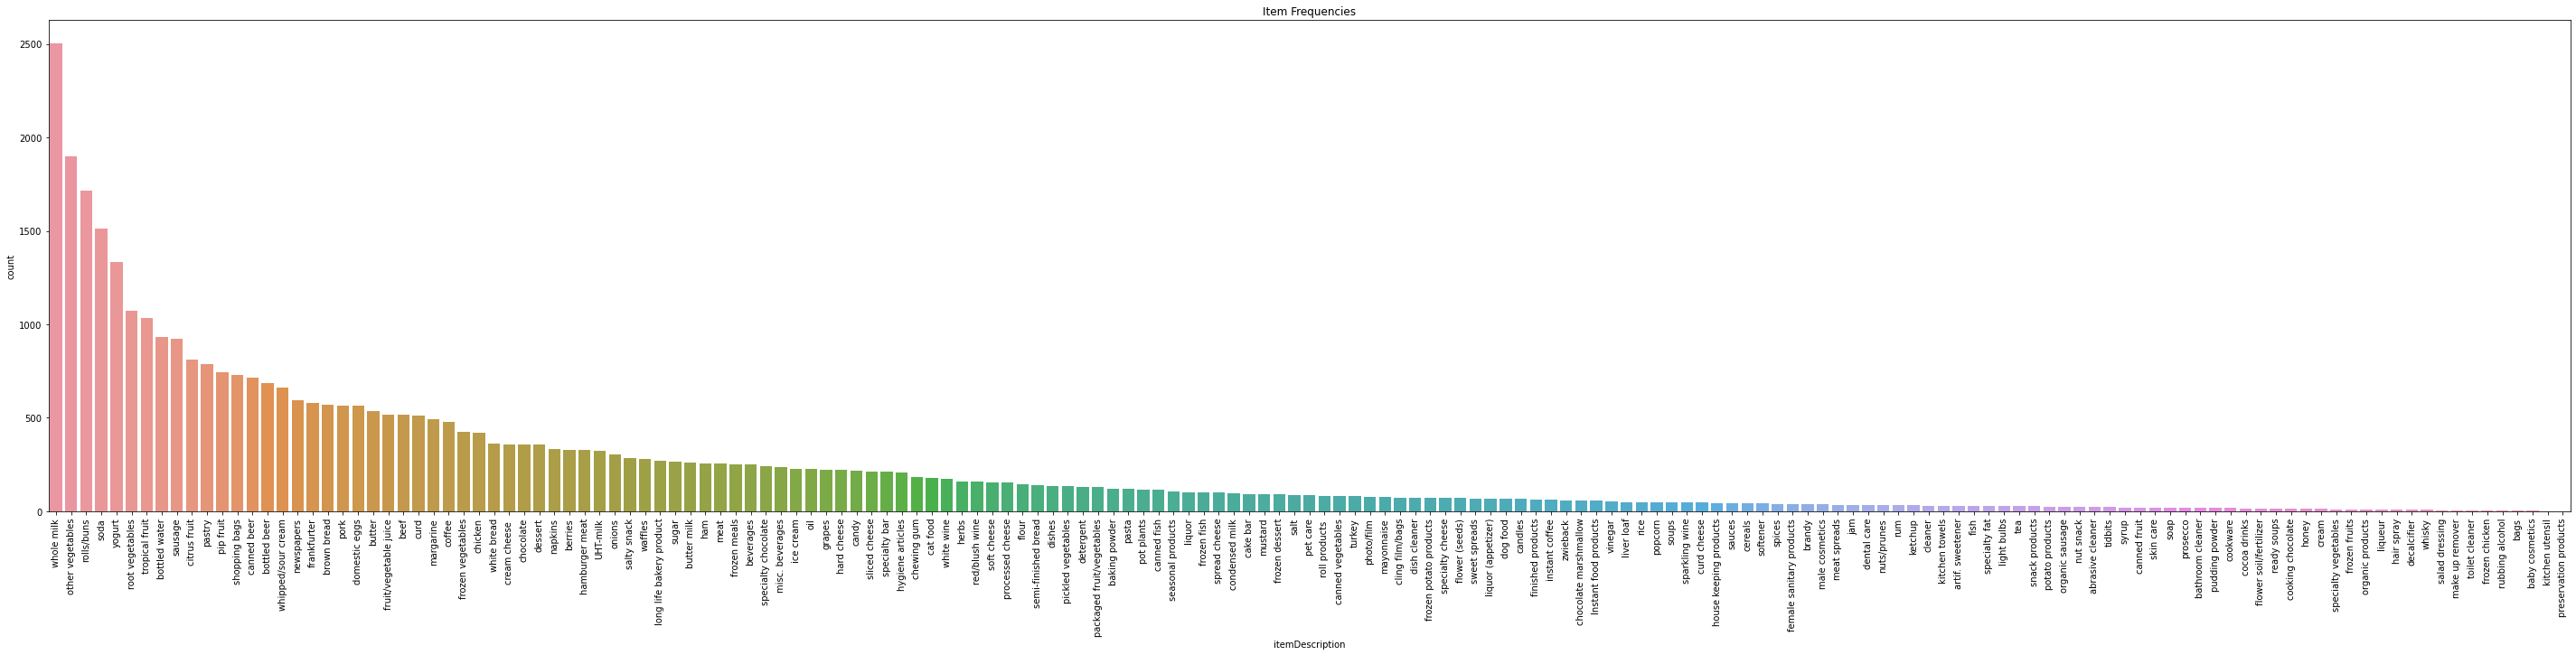

In [81]:
#Item Frequencies:
# Display a bar chart of item frequencies
plt.figure(figsize=(50, 10))
sns.countplot(x='itemDescription', data=df, order=df['itemDescription'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Item Frequencies')
plt.show()

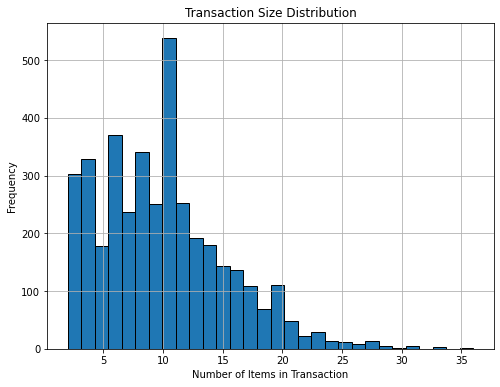

In [83]:
#Transaction Size Distribution
# Display a histogram of transaction sizes
plt.figure(figsize=(8, 6))
df.groupby('Member_number')['itemDescription'].count().hist(bins=30, edgecolor='black')
plt.xlabel('Number of Items in Transaction')
plt.ylabel('Frequency')
plt.title('Transaction Size Distribution')
plt.show()

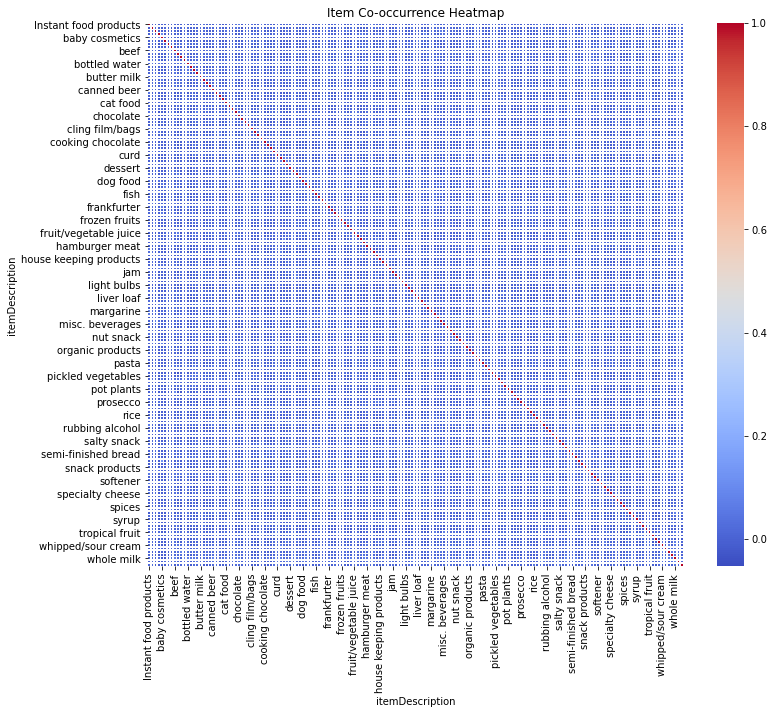

In [84]:
# Create a transaction-item matrix
transaction_item_matrix = df.pivot_table(index='Member_number', columns='itemDescription', aggfunc='size', fill_value=0)

# Compute the correlation matrix
item_correlation = transaction_item_matrix.corr()

# Display a heatmap of item co-occurrences
plt.figure(figsize=(12, 10))
sns.heatmap(item_correlation, cmap='coolwarm', linewidths=.5)
plt.title('Item Co-occurrence Heatmap')
plt.show()

# Analysis using df2

In [ ]:
def encode(item_freq):
    res = 0
    if item_freq > 0:
        res = 1
    return res
    
basket_input = df2.applymap(encode)

In [ ]:
#3. Market Basket Analysis

# install mlxtend

In [ ]:
pip install mlxtend


In [85]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [86]:

# Preprocess the data
try:
    basket = (df.groupby(['Member_number', 'Date', 'itemDescription'])
              .size().unstack().reset_index().fillna(0)
              .set_index(['Member_number', 'Date']))

    # Convert count values to binary (1 if item was purchased, 0 otherwise)
    basket_sets = basket.applymap(lambda x: 1 if x > 0 else 0)

    # Find frequent itemsets using Apriori
    frequent_itemsets = apriori(basket_sets, min_support=0.05, use_colnames=True)

    # Generate association rules
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

    # Display the top rules
    print(rules.head())

except KeyError as e:
    print(f"KeyError: {e}")
    print("Check if the column names used in the code match the actual column names in your DataFrame.")


Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


In [87]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(basket_input, min_support=0.01, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift")

rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,-0.214986
1,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350,-0.224474
2,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861,-0.190525
3,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638,-0.203508


from the table above, the antecedents and consequents columns shows items that are frequently purchased together. For example, first row of the dataset tells us that if a person were to buy roll/buns, then they are also likely to purchase whole milk.

In [88]:
rules.sort_values(["support", "confidence","lift"],axis = 0, ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,-0.214986
1,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350,-0.224474
2,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861,-0.190525
3,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638,-0.203508


The table above shows that the three most popular product combinations that are frequently bought together are:

Rolls and milk

Yogurt and milk

whole milk and yogurt

Rolls, Milk, Yogurt should be place close to one another inorder to increase sales

This is the conclusion of my analysis.I have successfully implemented market basket analysis on a retail dataset using the apriori algorithm and association rules. The result above can be used to make data-driven marketing decisions